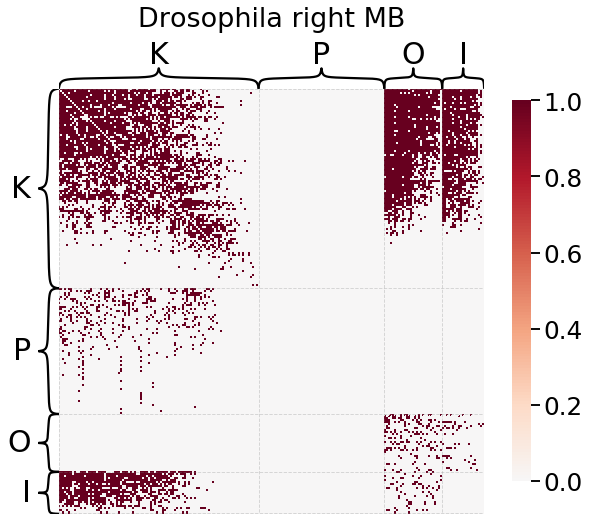

In [1]:
#Casey Weiner
#Test program for graspy, based on the tutorial section
#of graspy.neurodata.io
#Compiled every part of tutorial as listed on this webpage: https://graspy.neurodata.io/reference/index.html
import numpy as np
from graspy.datasets import load_drosophila_right
from graspy.plot import heatmap
from graspy.utils import binarize, symmetrize
from IPython import get_ipython
#%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

adj, labels = load_drosophila_right(return_labels=True)
adj = binarize(adj)
heatmap(adj,
        inner_hier_labels=labels,
        title='Drosophila right MB',
        font_scale=1.5,
        sort_nodes=True);


ER "p" parameter: 0.1661046088739007


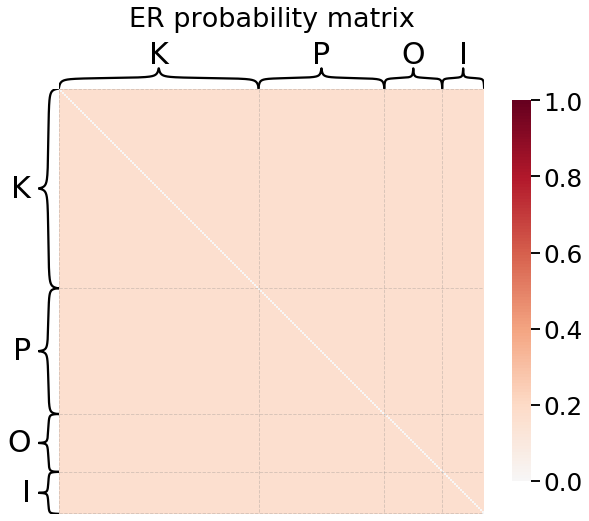

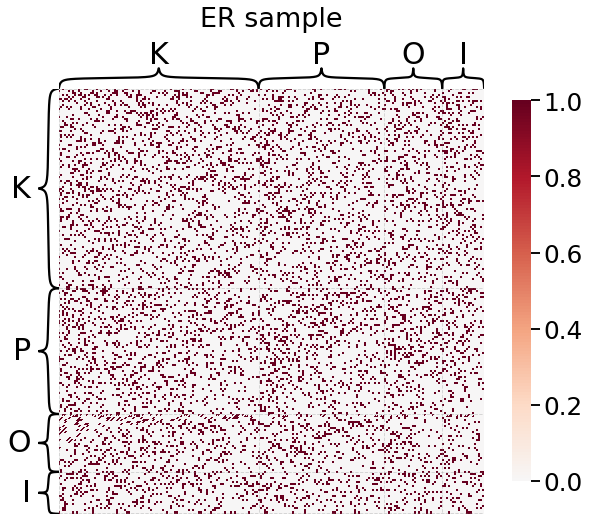

In [2]:
from graspy.models import EREstimator
er = EREstimator(directed=True,loops=False)
er.fit(adj)
print(f"ER \"p\" parameter: {er.p_}")
heatmap(er.p_mat_,
        inner_hier_labels=labels,
        font_scale=1.5,
        title="ER probability matrix",
        vmin=0, vmax=1,
        sort_nodes=True)
heatmap(er.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="ER sample",
        sort_nodes=True);

DCER "p" parameter: 7536.0


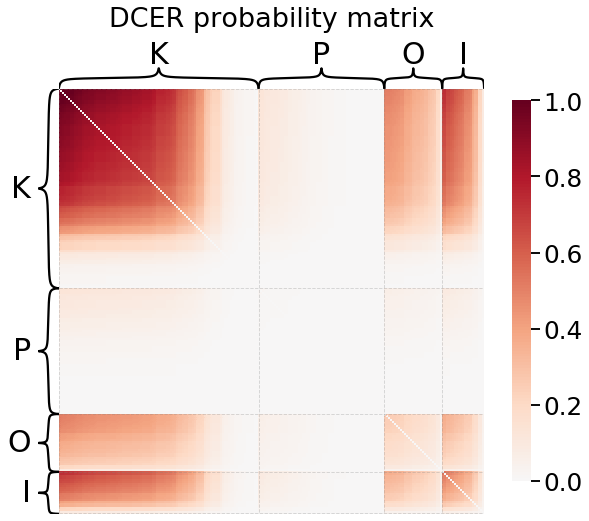

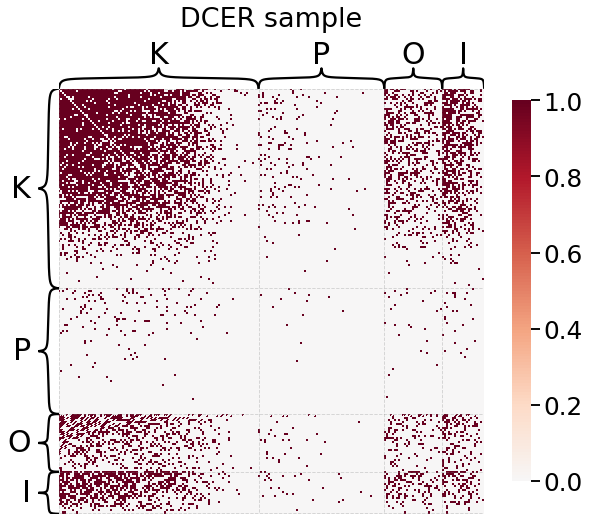

In [3]:
from graspy.models import DCEREstimator
dcer = DCEREstimator(directed=True,loops=False)
dcer.fit(adj)
print(f"DCER \"p\" parameter: {dcer.p_}")
heatmap(dcer.p_mat_,
        inner_hier_labels=labels,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="DCER probability matrix",
        sort_nodes=True);
heatmap(dcer.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="DCER sample",
        sort_nodes=True);

SBM "B" matrix:
[[0.         0.38333333 0.11986864 0.        ]
 [0.44571429 0.3584     0.49448276 0.        ]
 [0.09359606 0.         0.20095125 0.        ]
 [0.         0.07587302 0.         0.        ]]


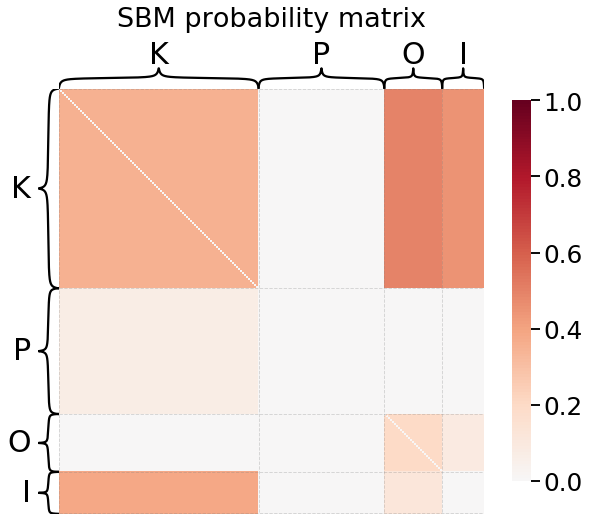

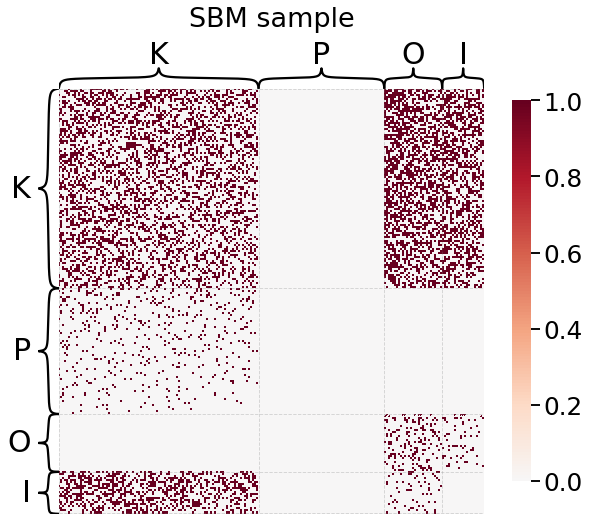

In [4]:
from graspy.models import SBMEstimator
sbme = SBMEstimator(directed=True,loops=False)
sbme.fit(adj, y=labels)
print("SBM \"B\" matrix:")
print(sbme.block_p_)
heatmap(sbme.p_mat_,
        inner_hier_labels=labels,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="SBM probability matrix",
        sort_nodes=True)
heatmap(sbme.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="SBM sample",
        sort_nodes=True);


DCSBM "B" matrix:
[[   0.  805.   73.    0.]
 [ 936. 3584. 1434.    0.]
 [  57.    0.  169.    0.]
 [   0.  478.    0.    0.]]


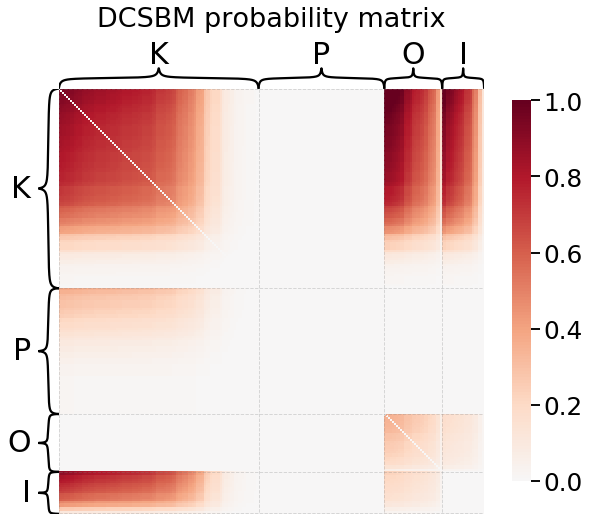

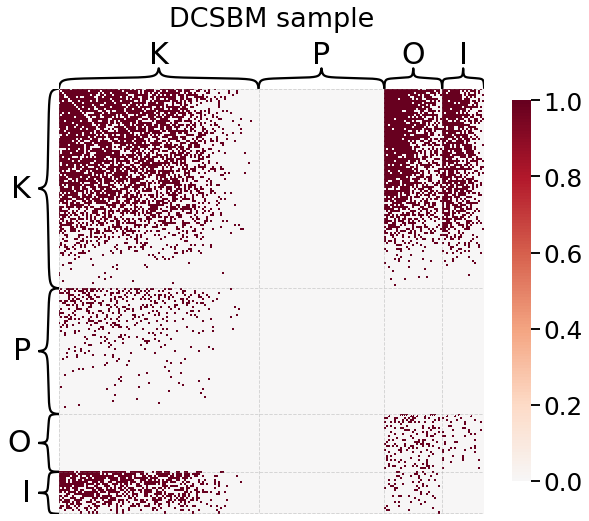

In [5]:
from graspy.models import DCSBMEstimator
dcsbme = DCSBMEstimator(directed=True,loops=False)
dcsbme.fit(adj, y=labels)
print("DCSBM \"B\" matrix:")
print(dcsbme.block_p_)
heatmap(dcsbme.p_mat_,
        inner_hier_labels=labels,
        font_scale=1.5,
        title="DCSBM probability matrix",
        vmin=0,
        vmax=1,
        sort_nodes=True)
heatmap(dcsbme.sample()[0],
        inner_hier_labels=labels,
        title="DCSBM sample",
        font_scale=1.5,
        sort_nodes=True);


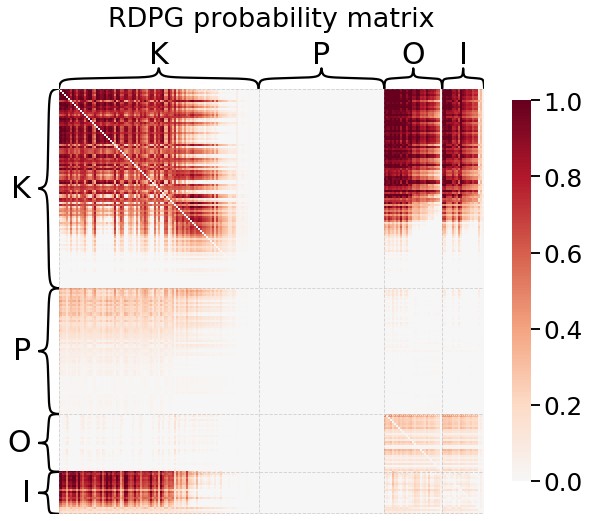

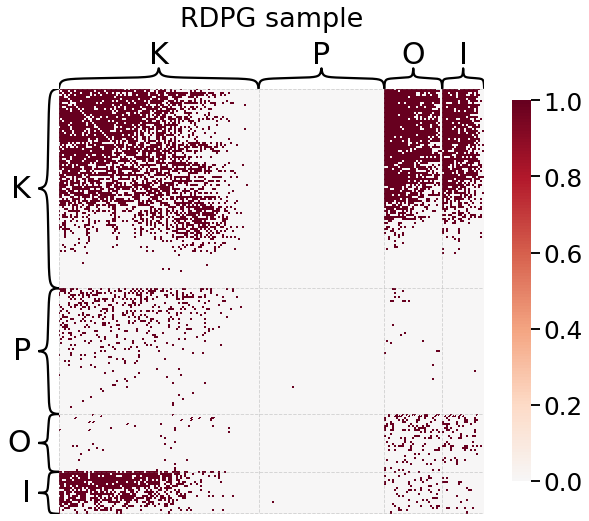

In [6]:
from graspy.models import RDPGEstimator
rdpge = RDPGEstimator(loops=False)
rdpge.fit(adj, y=labels)
heatmap(rdpge.p_mat_,
        inner_hier_labels=labels,
        vmin=0,
        vmax=1,
        font_scale=1.5,
        title="RDPG probability matrix",
        sort_nodes=True
       )
heatmap(rdpge.sample()[0],
        inner_hier_labels=labels,
        font_scale=1.5,
        title="RDPG sample",
        sort_nodes=True);



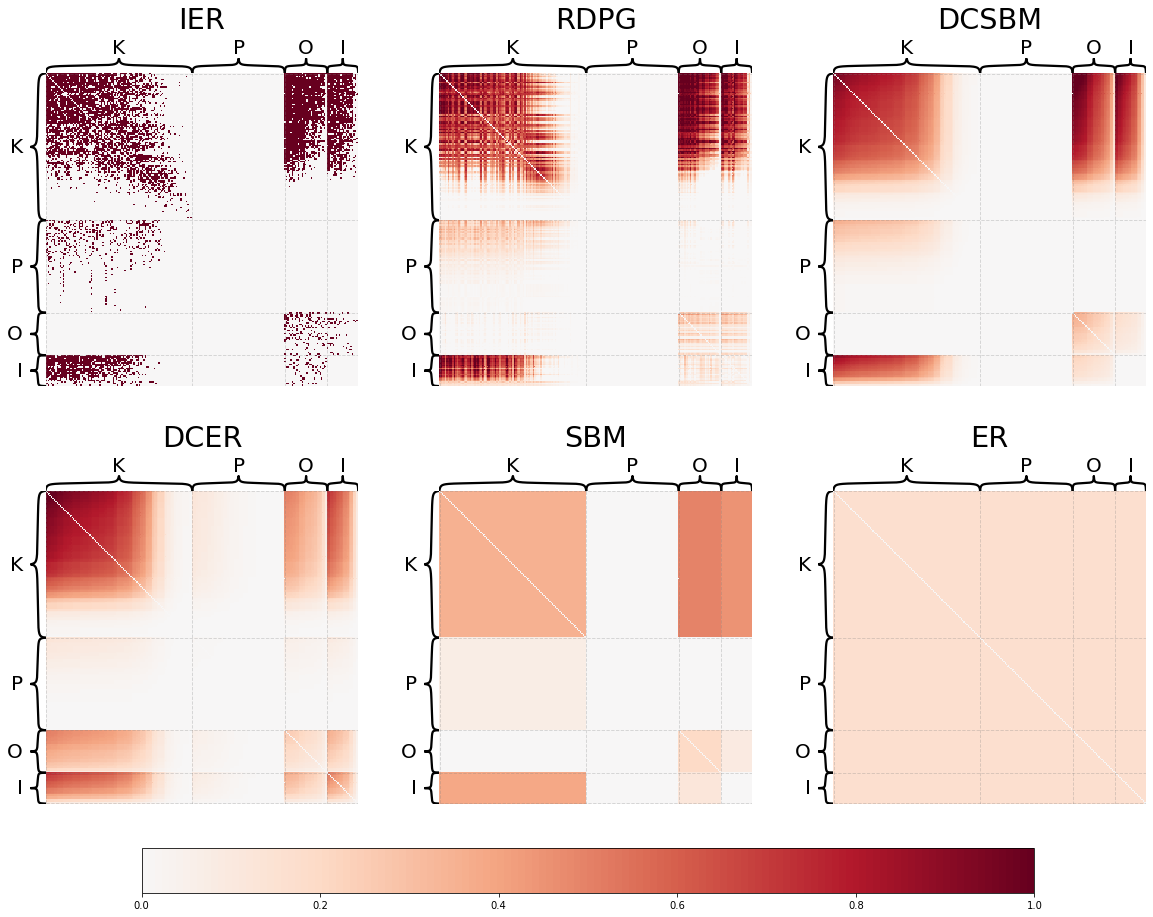

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

fig, axs = plt.subplots(2, 3, figsize=(20, 16))

# colormapping
cmap = cm.get_cmap("RdBu_r")

center = 0
vmin = 0
vmax = 1
norm = mpl.colors.Normalize(0, 1)
cc = np.linspace(0.5, 1, 256)
cmap = mpl.colors.ListedColormap(cmap(cc))

# heatmapping
heatmap_kws = dict(
    inner_hier_labels=labels,
    vmin=0,
    vmax=1,
    cbar=False,
    cmap=cmap,
    center=None,
    hier_label_fontsize=20,
    title_pad=45,
    font_scale=1.6,
    sort_nodes=True
)

models = [rdpge, dcsbme, dcer, sbme, er]
model_names = ["RDPG", "DCSBM","DCER", "SBM", "ER"]

heatmap(adj, ax=axs[0][0], title="IER", **heatmap_kws)
heatmap(models[0].p_mat_, ax=axs[0][1], title=model_names[0], **heatmap_kws)
heatmap(models[1].p_mat_, ax=axs[0][2], title=model_names[1], **heatmap_kws)
heatmap(models[2].p_mat_, ax=axs[1][0], title=model_names[2], **heatmap_kws)
heatmap(models[3].p_mat_, ax=axs[1][1], title=model_names[3], **heatmap_kws)
heatmap(models[4].p_mat_, ax=axs[1][2], title=model_names[4], **heatmap_kws)


# add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(dcsbme.p_mat_)
fig.colorbar(sm,
             ax=axs,
             orientation="horizontal",
             pad=0.04,
             shrink=0.8,
             fraction=0.08,
             drawedges=False)

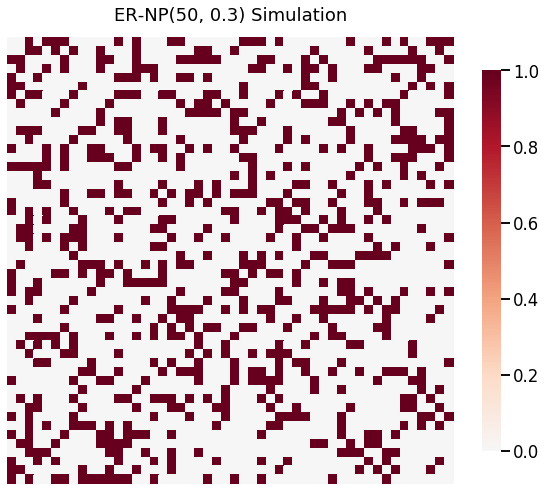

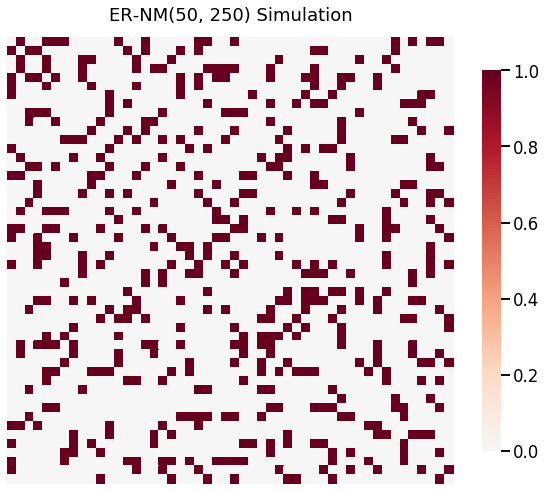

In [8]:
import graspy

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from graspy.simulations import er_nm, er_np

n = 50
m = 250
p = 0.3

np.random.seed(1)
G1 = er_np(n=n, p=p)
G2 = er_nm(n=n, m=m)
from graspy.plot import heatmap

heatmap(G1, title = 'ER-NP(50, 0.3) Simulation')
heatmap(G2, title = 'ER-NM(50, 250) Simulation')


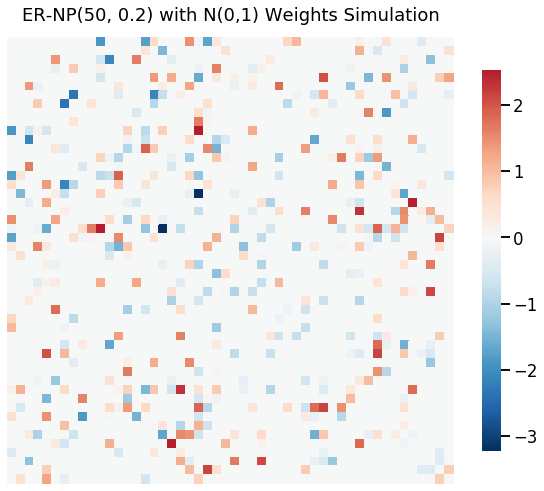

In [9]:
wt = np.random.normal
wtargs = dict(loc=0, scale=1)

G1 = er_np(n=50, p=0.2, wt=wt, wtargs=wtargs)
heatmap(G1, title = 'ER-NP(50, 0.2) with N(0,1) Weights Simulation')


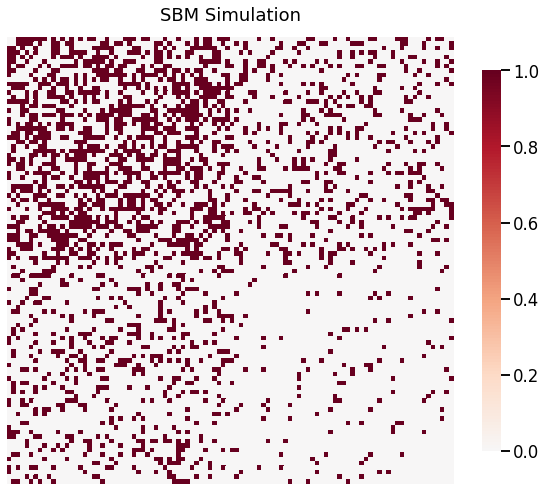

In [10]:
from graspy.simulations import sbm

n = [50, 50]
p = [[0.5, 0.2],
     [0.2, 0.05]]

np.random.seed(1)
G = sbm(n=n, p=p)
from graspy.plot import heatmap

heatmap(G, title ='SBM Simulation')


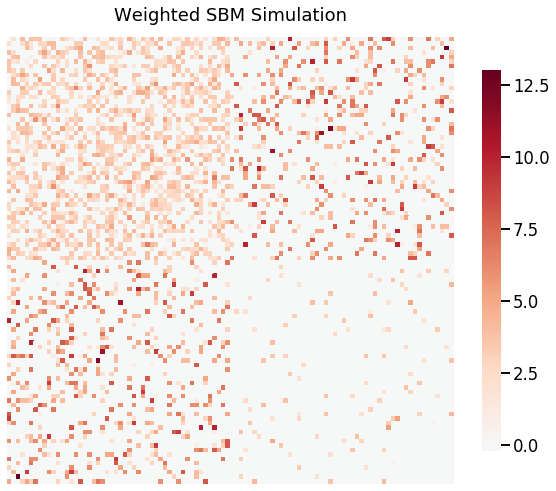

In [11]:
from numpy.random import normal, poisson

n = [50, 50]
p = [[0.5, 0.2],
     [0.2, 0.05]]
wt = [[normal, poisson],
      [poisson, normal]]
wtargs = [[dict(loc=3, scale=1), dict(lam=5)],
          [dict(lam=5), dict(loc=3, scale=1)]]

G = sbm(n=n, p=p, wt=wt, wtargs=wtargs)
heatmap(G, title='Weighted SBM Simulation')


In [12]:
from graspy.simulations import rdpg

# Create a latent position matrix
X = np.full((100, 2), 0.5)
print(X @ X.T)



[[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


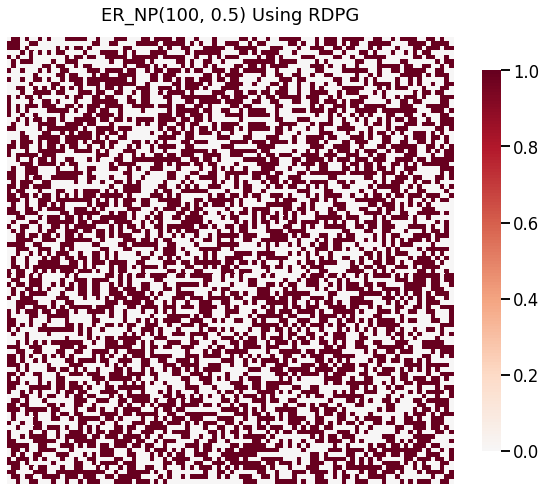

In [13]:
A = rdpg(X)
from graspy.plot import heatmap

heatmap(A, title='ER_NP(100, 0.5) Using RDPG')

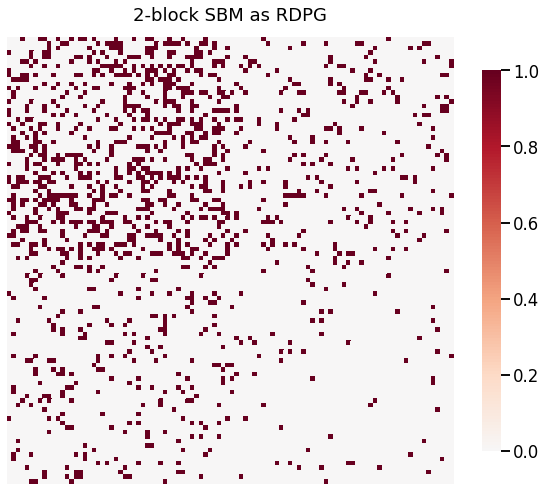

In [14]:
X = np.array([[0.5, 0.2, 0.2]] * 50 + [[0.1, 0.1, 0.1]] * 50)
A_rdpg = rdpg(X, loops=False)
heatmap(A_rdpg, title='2-block SBM as RDPG')

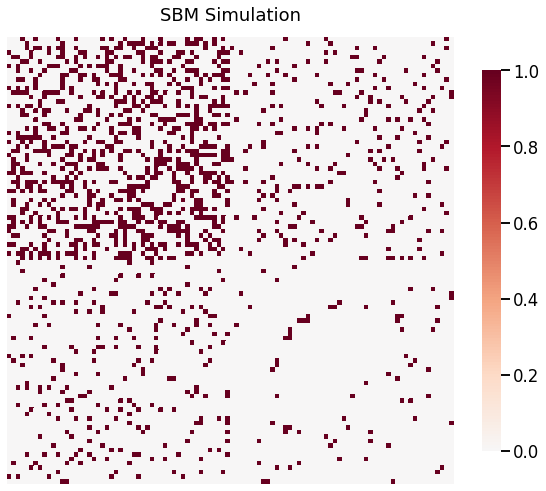

In [15]:
from graspy.simulations import sbm

n = [50, 50]
p = [[0.33, 0.09], [0.09, 0.03]]

A_sbm = sbm(n, p)
heatmap(A_sbm, title = 'SBM Simulation')


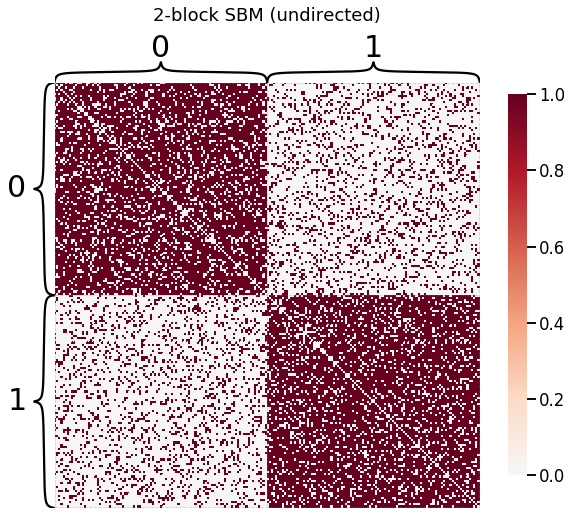

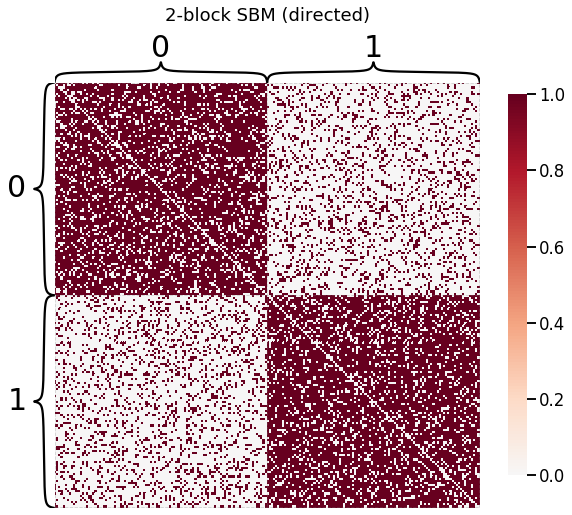

In [16]:
import numpy as np
np.random.seed(8889)
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm
from graspy.plot import heatmap, pairplot

%matplotlib inline

n_verts = 100
labels_sbm = n_verts * [0] + n_verts * [1]
P = np.array([[0.8, 0.2], [0.2, 0.8]])
undirected_sbm = sbm(2 * [n_verts], P)
heatmap(undirected_sbm, title='2-block SBM (undirected)', inner_hier_labels=labels_sbm)
directed_sbm = sbm(2 * [n_verts], P, directed=True)
heatmap(directed_sbm, title='2-block SBM (directed)', inner_hier_labels=labels_sbm)

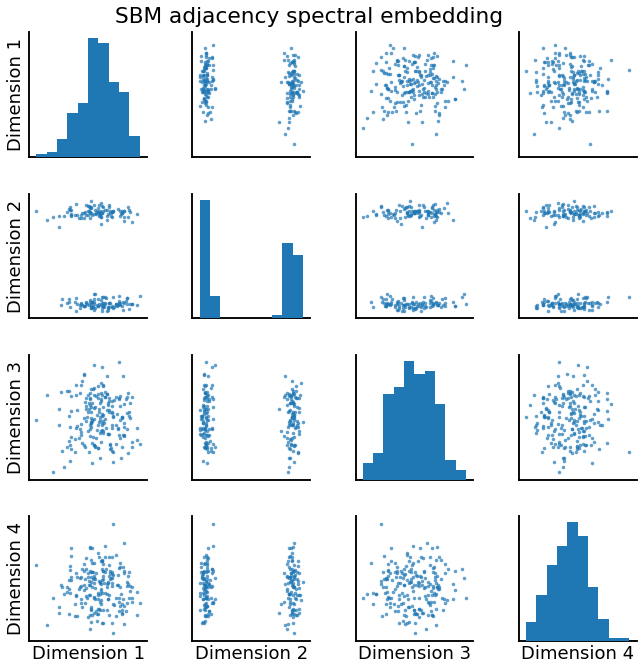

In [17]:
ase = AdjacencySpectralEmbed()
Xhat = ase.fit_transform(undirected_sbm)
pairplot(Xhat, title='SBM adjacency spectral embedding')

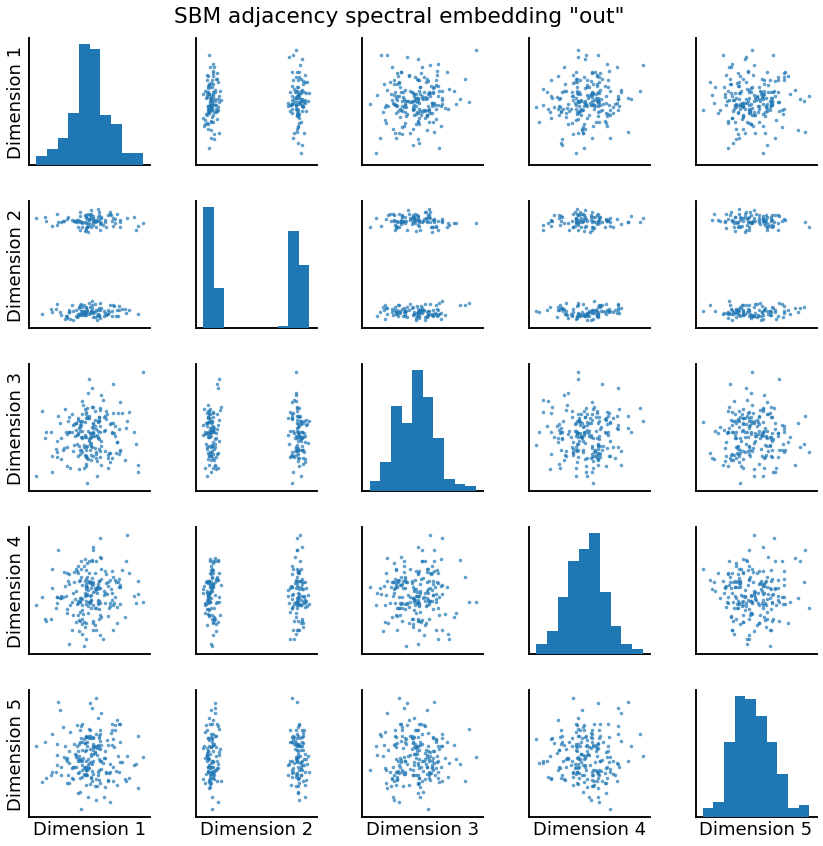

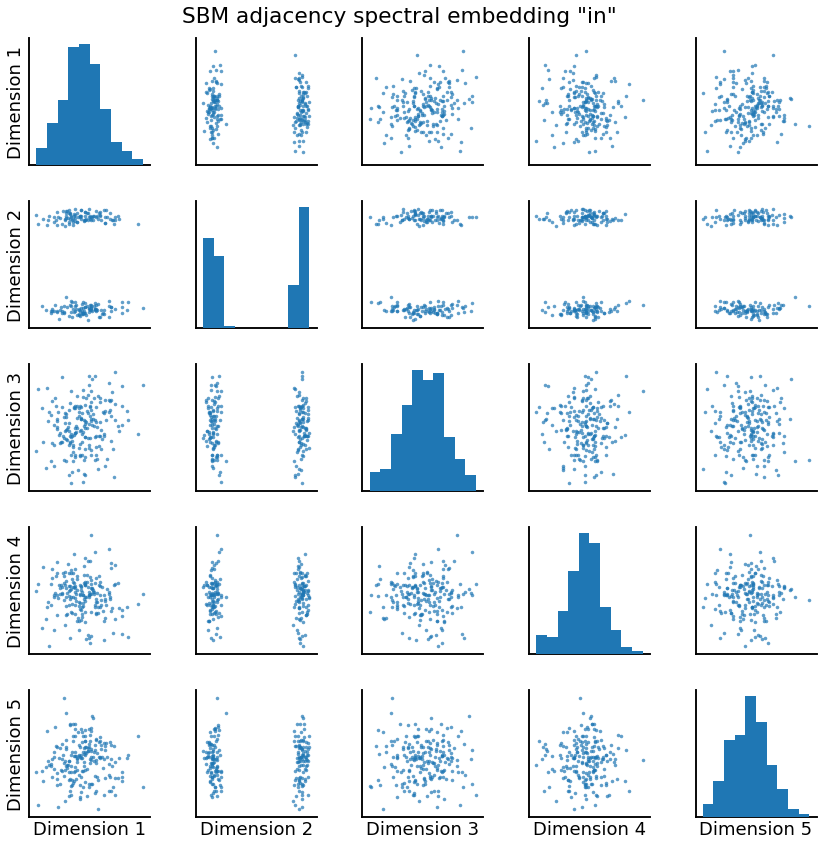

In [18]:
ase = AdjacencySpectralEmbed()
Xhat, Yhat = ase.fit_transform(directed_sbm)
pairplot(Xhat, title='SBM adjacency spectral embedding "out"')
pairplot(Yhat, title='SBM adjacency spectral embedding "in"')

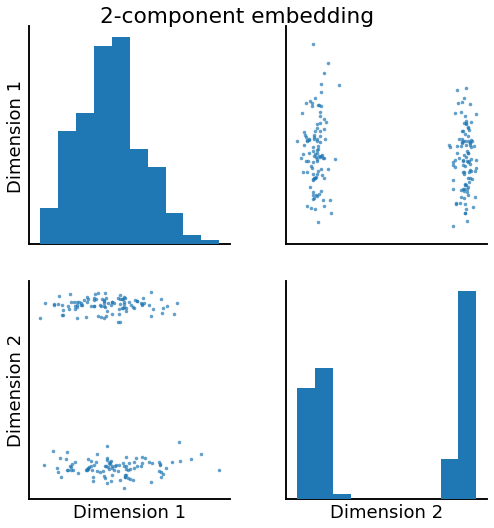

In [19]:
ase = AdjacencySpectralEmbed(n_components=2, algorithm='truncated')
Xhat = ase.fit_transform(undirected_sbm)
pairplot(Xhat, title='2-component embedding', height=4)

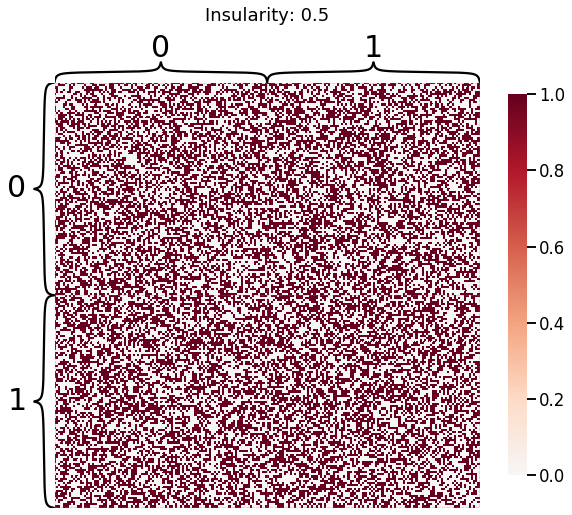

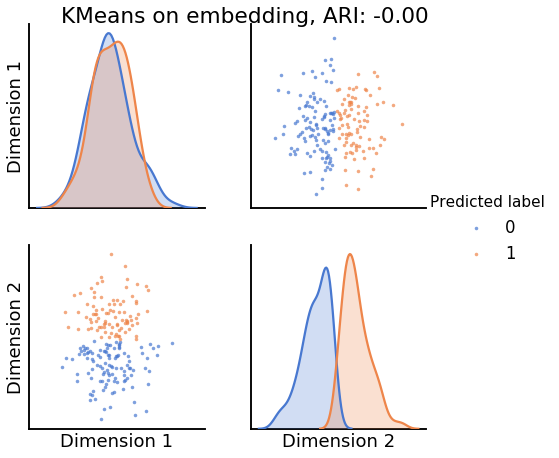

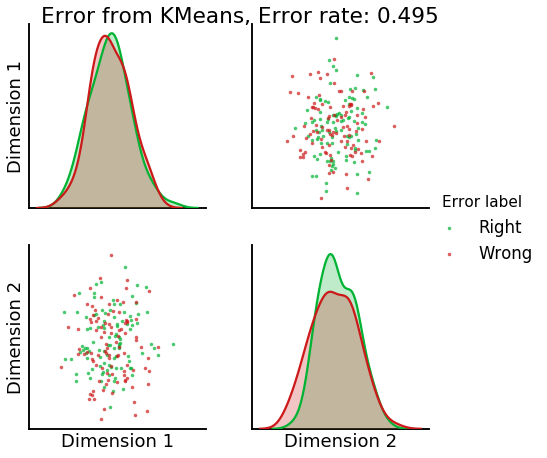

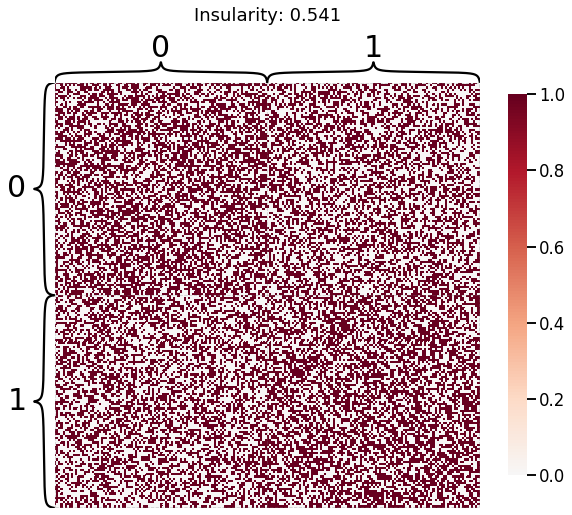

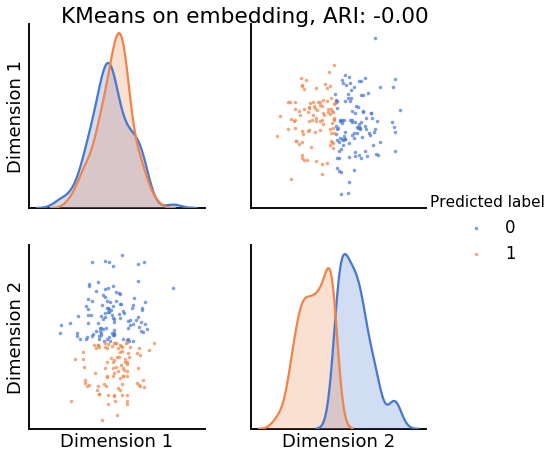

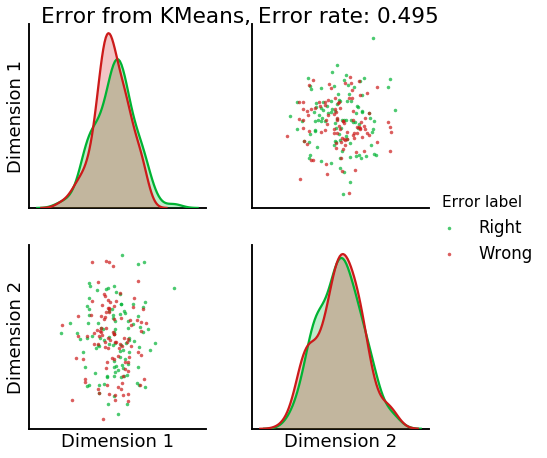

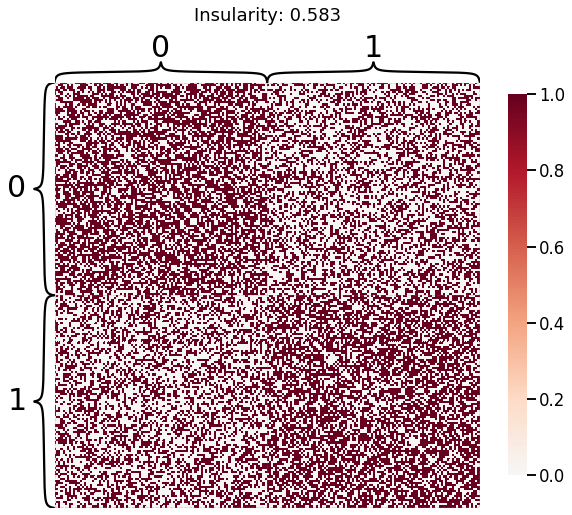

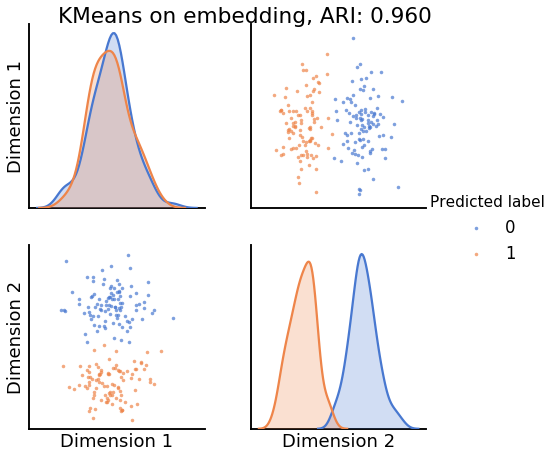

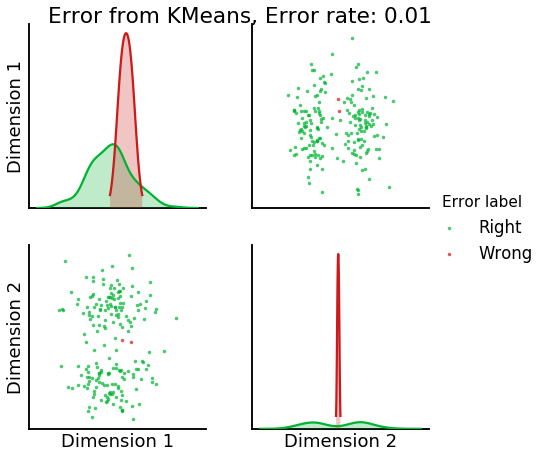

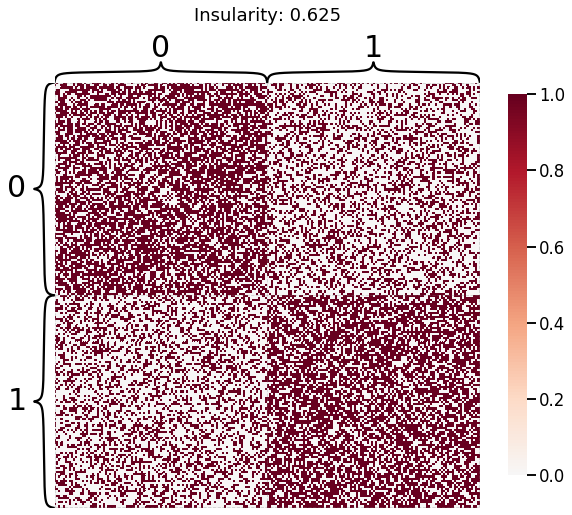

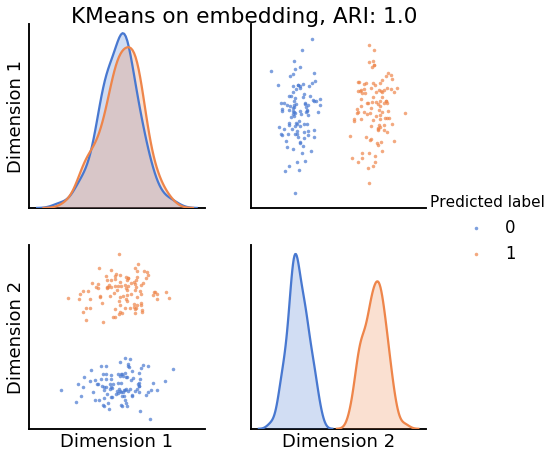

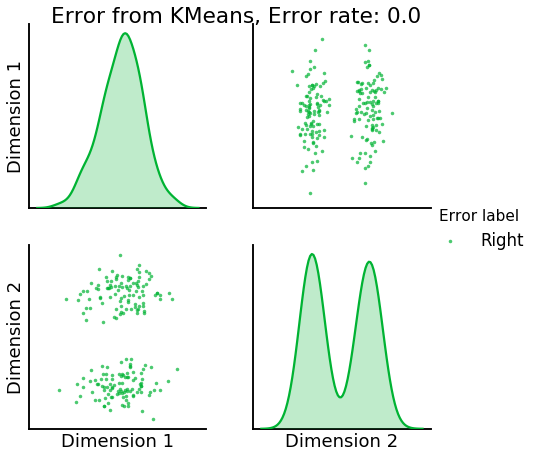

In [20]:
palette = {'Right':(0,0.7,0.2),
           'Wrong':(0.8,0.1,0.1)}
for insularity in np.linspace(0.5, 0.625, 4):
    P = np.array([[insularity, 1-insularity], [1-insularity, insularity]])
    sampled_sbm = sbm(2 * [n_verts], P)
    heatmap(sampled_sbm, title='Insularity: {}'.format(str(insularity)[:5]), inner_hier_labels=labels_sbm)
    Xhat = AdjacencySpectralEmbed(n_components=2).fit_transform(sampled_sbm)
    labels_kmeans = KMeans(n_clusters=2).fit_predict(Xhat)
    ari = adjusted_rand_score(labels_sbm, labels_kmeans)
    error = labels_sbm - labels_kmeans
    error = error != 0
    # sometimes the labels given by kmeans will be the inverse of ours
    if np.sum(error) / (2 * n_verts) > 0.5:
        error = error == 0
    error_rate = np.sum(error) / (2 * n_verts)
    error_label = (2 * n_verts) * ['Right']
    error_label = np.array(error_label)
    error_label[error] = 'Wrong'

    pairplot(Xhat,
             labels=labels_kmeans,
             title='KMeans on embedding, ARI: {}'.format(str(ari)[:5]),
             legend_name='Predicted label',
             height=3.5,
             palette='muted')
    pairplot(Xhat,
             labels=error_label,
             title='Error from KMeans, Error rate: {}'.format(str(error_rate)),
             legend_name='Error label',
             height=3.5,
             palette=palette)

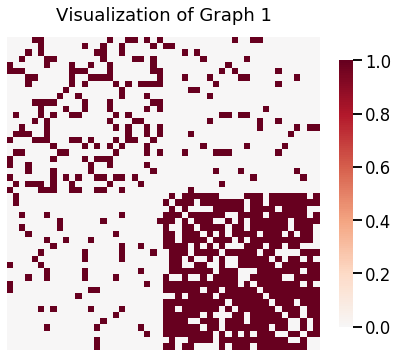

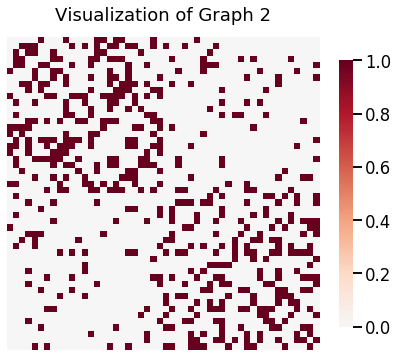

In [22]:
from graspy.simulations import sbm

n = [25, 25]
P1 = [[.3, .1],
      [.1, .7]]
P2 = [[.3, .1],
      [.1, .3]]

np.random.seed(8)
G1 = sbm(n, P1)
G2 = sbm(n, P2)
from graspy.plot import heatmap

heatmap(G1, figsize=(7, 7), title='Visualization of Graph 1')
heatmap(G2, figsize=(7, 7), title='Visualization of Graph 2')

In [23]:
from graspy.embed import OmnibusEmbed

embedder = OmnibusEmbed()
Zhat = embedder.fit_transform([G1, G2])

print(Zhat.shape)


(2, 50, 2)


Text(0.5, 1.0, 'Latent Positions from Omnibus Embedding')

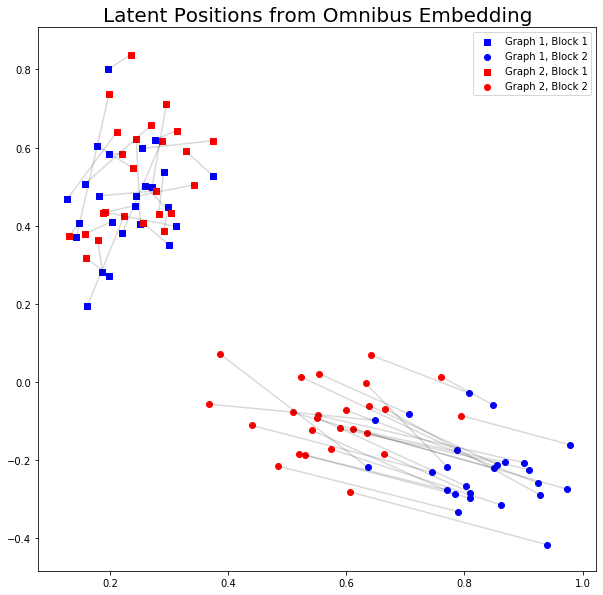

In [24]:
Xhat1 = Zhat[0]
Xhat2 = Zhat[1]

# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(Xhat1[:25, 0], Xhat1[:25, 1], marker='s', c='blue', label = 'Graph 1, Block 1')
ax.scatter(Xhat1[25:, 0], Xhat1[25:, 1], marker='o', c='blue', label = 'Graph 1, Block 2')
ax.scatter(Xhat2[:25, 0], Xhat2[:25, 1], marker='s', c='red', label = 'Graph 2, Block 1')
ax.scatter(Xhat2[25:, 0], Xhat2[25:, 1], marker='o', c='red', label= 'Graph 2, Block 2')
ax.legend()

# Plot lines between matched pairs of points
for i in range(50):
    ax.plot([Xhat1[i, 0], Xhat2[i, 0]], [Xhat1[i, 1], Xhat2[i, 1]], 'black', alpha = 0.15)

ax.set_title('Latent Positions from Omnibus Embedding', fontsize=20)

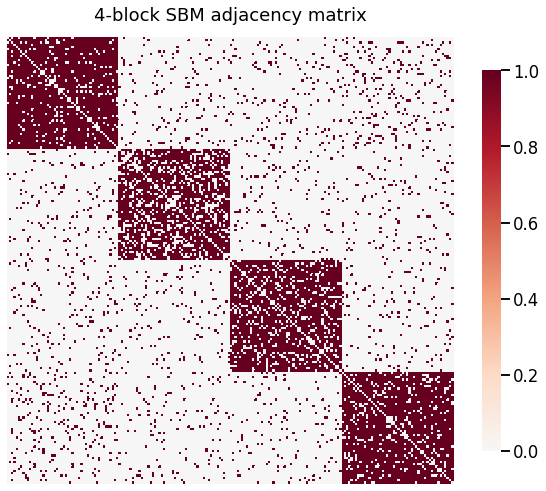

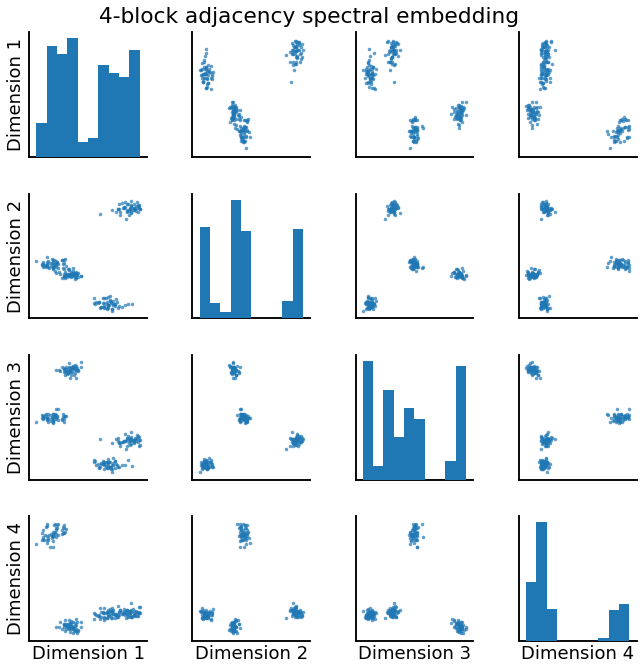

In [25]:
import numpy as np
np.random.seed(88889999)

from graspy.inference import LatentPositionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

%matplotlib inline
n_components = 4 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1],
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
csize = [50] * 4
A = sbm(csize, P)
X = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A)
heatmap(A, title='4-block SBM adjacency matrix')
pairplot(X, title='4-block adjacency spectral embedding')

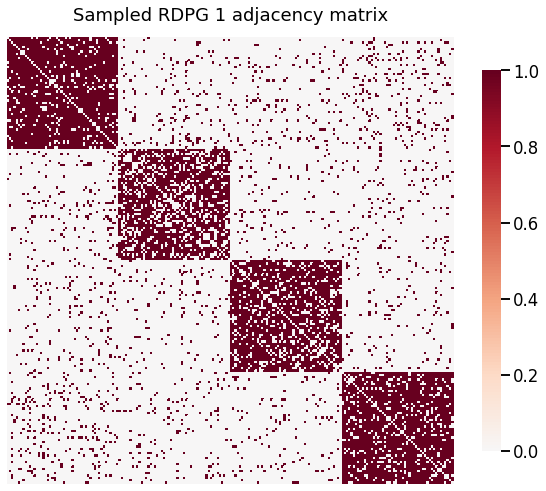

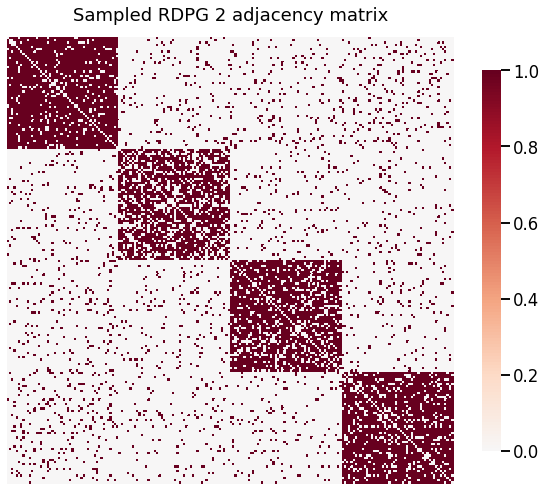

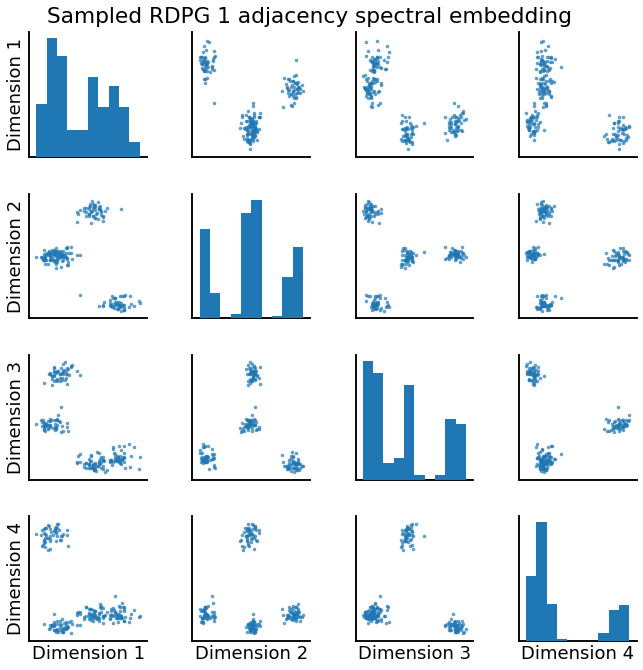

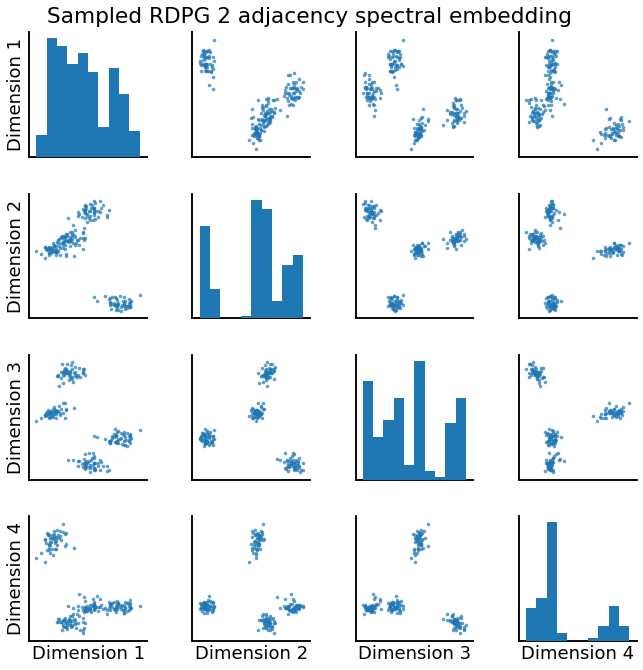

In [26]:
A1 = rdpg(X,
          loops=False,
          rescale=False,
          directed=False)
A2 = rdpg(X,
          loops=False,
          rescale=False,
          directed=False)

Xhat1 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A1)
Xhat2 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A2)

heatmap(A1, title='Sampled RDPG 1 adjacency matrix')
heatmap(A2, title='Sampled RDPG 2 adjacency matrix')
pairplot(Xhat1, title='Sampled RDPG 1 adjacency spectral embedding')
pairplot(Xhat2, title='Sampled RDPG 2 adjacency spectral embedding')

In [27]:
lpt = LatentPositionTest(n_bootstraps=200, n_components=n_components)
lpt.fit(A1, A2)
print('p = {}'.format(lpt.p_value_))

p = 0.9925


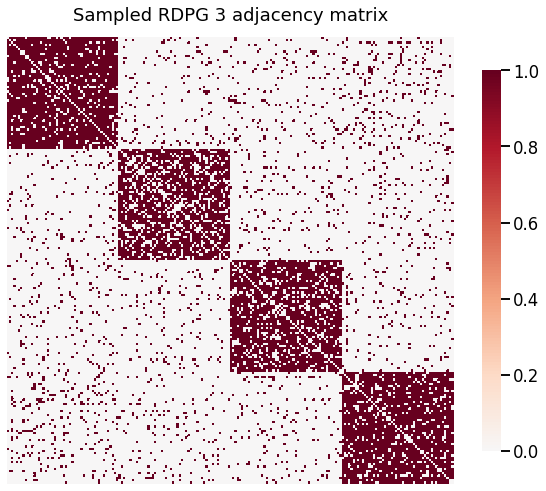

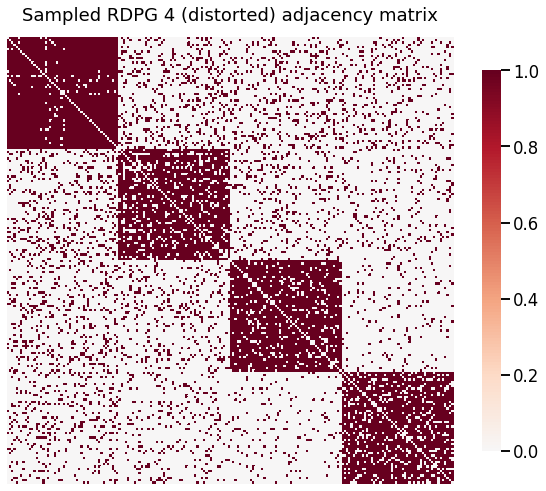

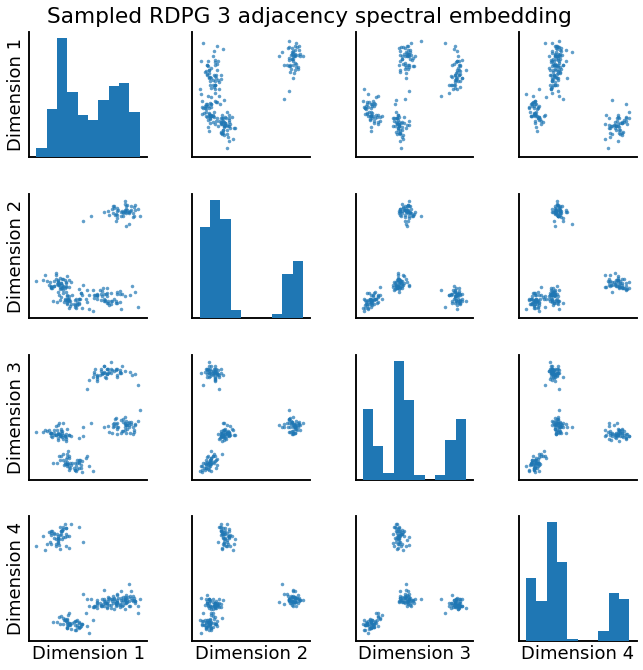

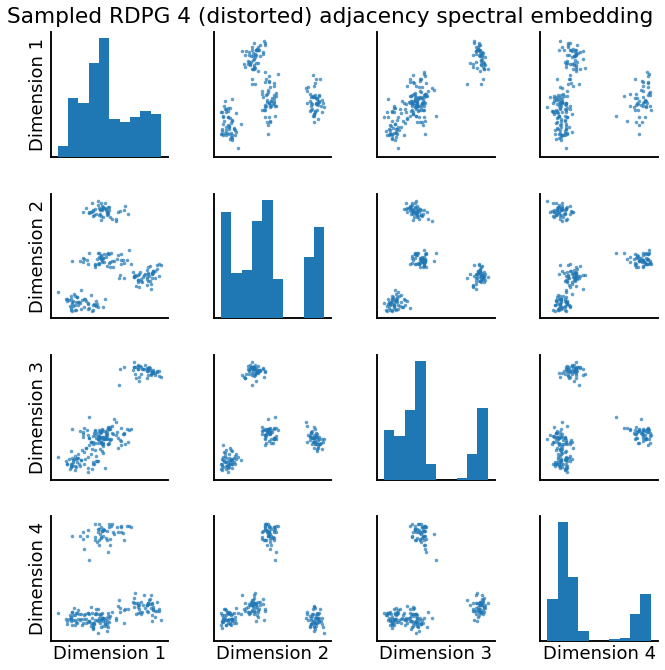

In [28]:
A3 = rdpg(X,
          loops=False,
          rescale=False,
          directed=False)
A4 = rdpg(X + np.random.normal(0.05, 0.02, size=(X.shape)),
          loops=False,
          rescale=False,
          directed=False)

Xhat3 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A3)
Xhat4 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A4)

heatmap(A3, title='Sampled RDPG 3 adjacency matrix')
heatmap(A4, title='Sampled RDPG 4 (distorted) adjacency matrix')
pairplot(Xhat3, title='Sampled RDPG 3 adjacency spectral embedding')
pairplot(Xhat4, title='Sampled RDPG 4 (distorted) adjacency spectral embedding')


In [29]:
lpt = LatentPositionTest(n_bootstraps=200, n_components=n_components)
lpt.fit(A3, A4)
print('p = {}'.format(lpt.p_value_))

p = 0.0025


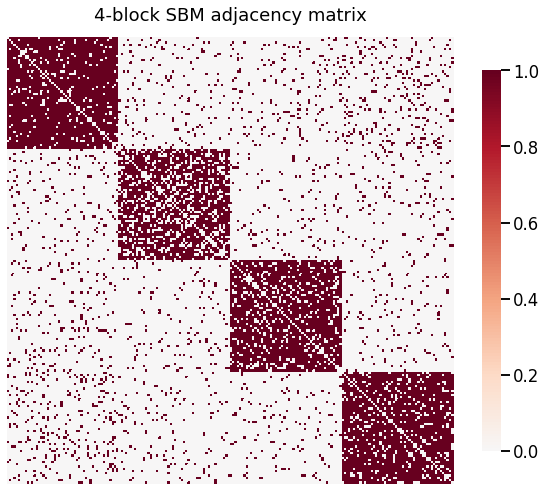

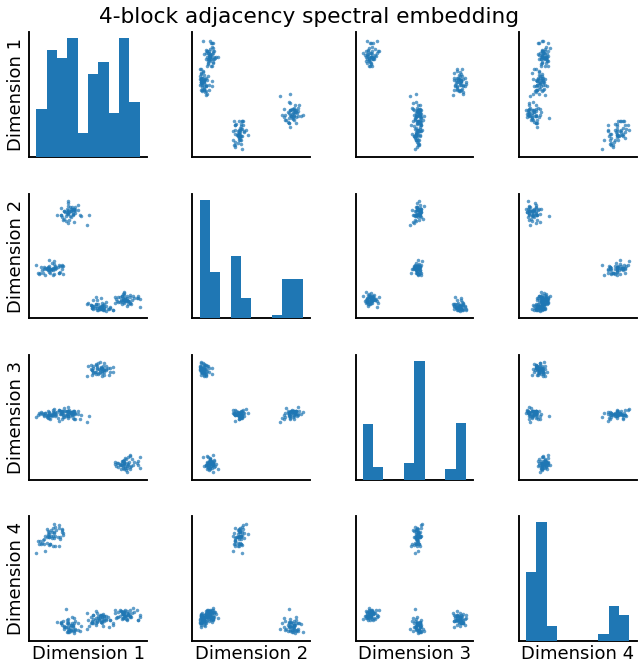

In [30]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(8888)

from graspy.inference import LatentDistributionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm, rdpg
from graspy.utils import symmetrize
from graspy.plot import heatmap, pairplot

%matplotlib inline
n_components = 4 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1],
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
csize = [50] * 4
A = sbm(csize, P)
X = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A)
heatmap(A, title='4-block SBM adjacency matrix')
pairplot(X, title='4-block adjacency spectral embedding')

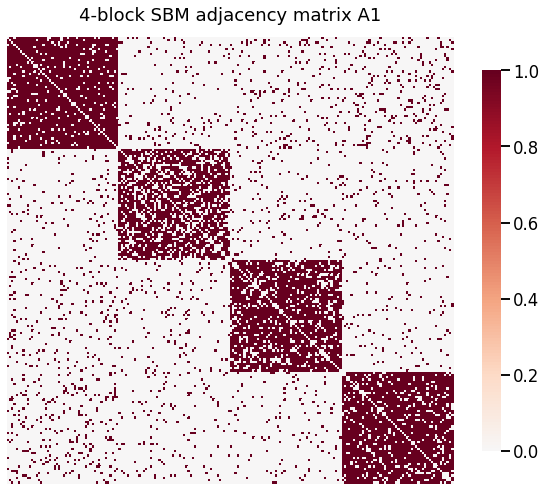

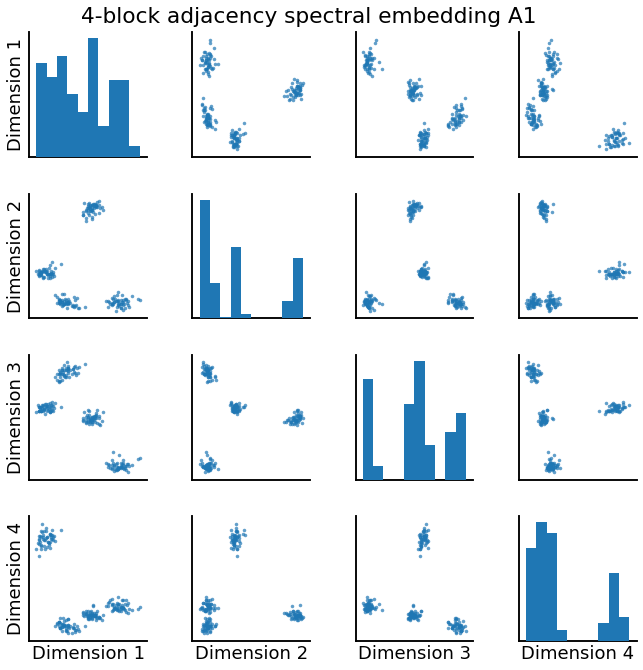

In [31]:
A1 = sbm(csize, P)
heatmap(A1, title='4-block SBM adjacency matrix A1')
X1 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A1)
pairplot(X1, title='4-block adjacency spectral embedding A1')

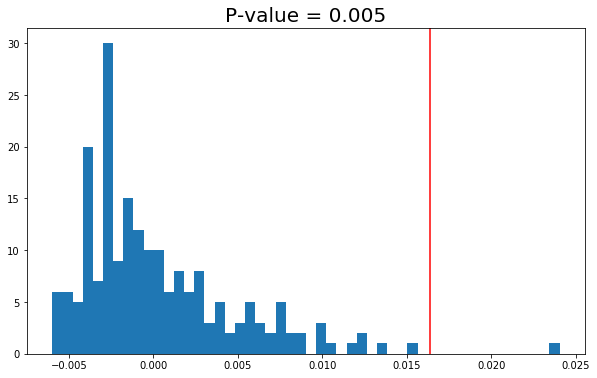

In [32]:
ldt = LatentDistributionTest()
p = ldt.fit(A, A1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(ldt.null_distribution_, 50)
ax.axvline(ldt.sample_T_statistic_, color='r')
ax.set_title("P-value = {}".format(p), fontsize=20)
plt.show();

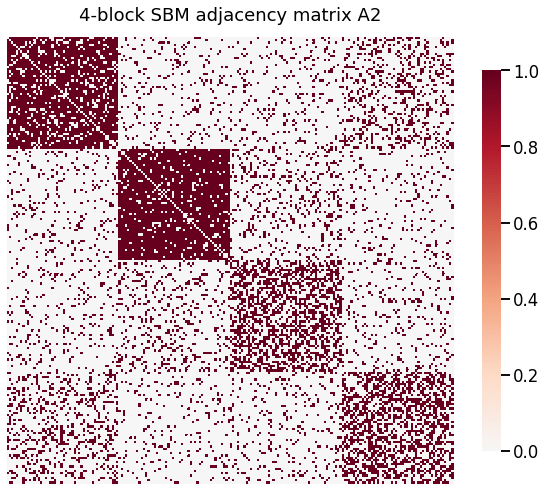

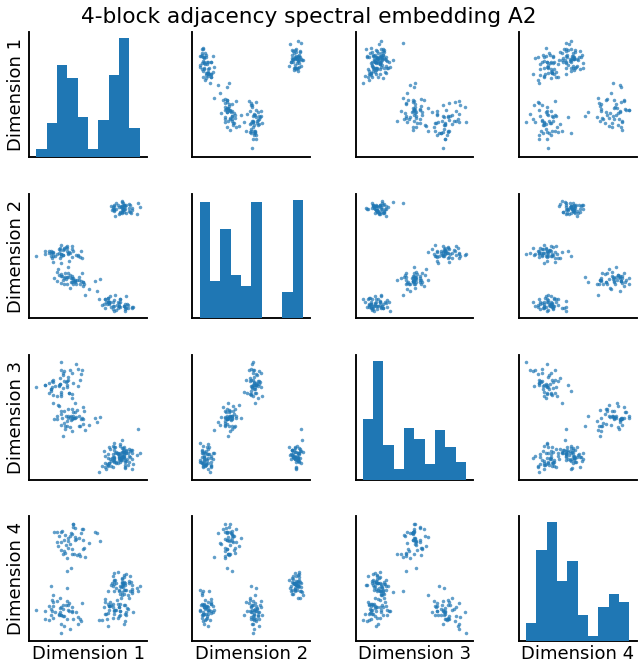

In [33]:
P2 = np.array([[0.8, 0.2, 0.2, 0.5],
              [0, 0.9, 0.3, 0.2],
              [0, 0, 0.5, 0.2],
              [0, 0, 0, 0.5]])

P2 = symmetrize(P2)
A2 = sbm(csize, P2)
heatmap(A2, title='4-block SBM adjacency matrix A2')
X2 = AdjacencySpectralEmbed(n_components=n_components).fit_transform(A2)
pairplot(X2, title='4-block adjacency spectral embedding A2')

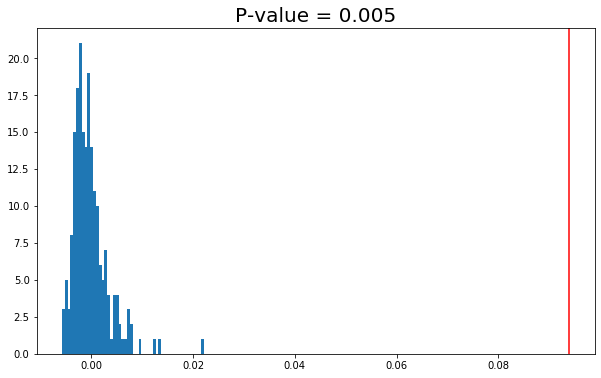

In [34]:
ldt = LatentDistributionTest()
p = ldt.fit(A, A2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(ldt.null_distribution_, 50)
ax.axvline(ldt.sample_T_statistic_, color='r')
ax.set_title("P-value = {}".format(p), fontsize=20)
plt.show();



In [35]:
from graspy.simulations import sbm

n_communities = [50, 50]
p = [[0.8, 0.2],
     [0.2, 0.8]]

wt = np.random.poisson
wtargs = dict(lam=3)
A_poisson= sbm(n_communities, p, wt=wt, wtargs=wtargs)

wt = np.random.normal
wtargs = dict(loc=5, scale=1)
A_normal = sbm(n_communities, p, wt=wt, wtargs=wtargs)

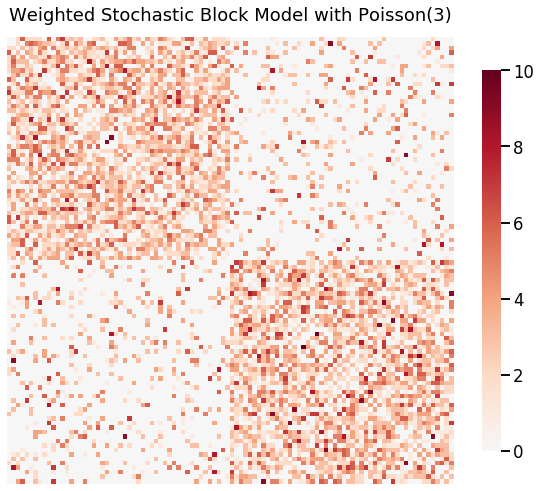

In [36]:
from graspy.plot import heatmap

title = 'Weighted Stochastic Block Model with Poisson(3)'

fig= heatmap(A_poisson, title=title)



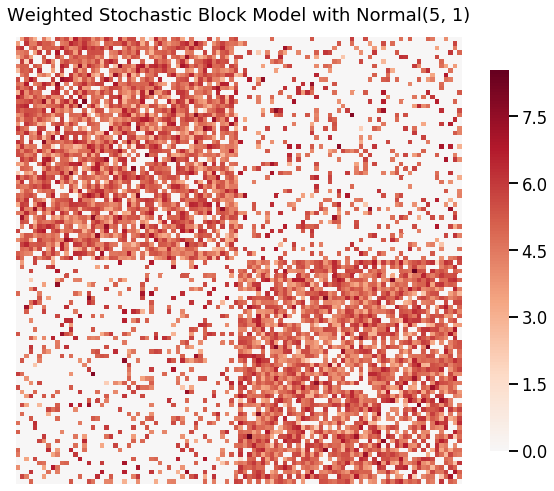

In [37]:
title = 'Weighted Stochastic Block Model with Normal(5, 1)'

fig= heatmap(A_normal, title=title)



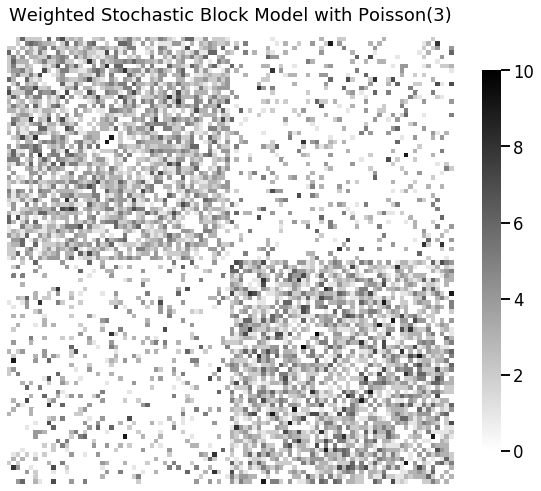

In [38]:
title = 'Weighted Stochastic Block Model with Poisson(3)'

fig= heatmap(A_poisson, title=title, transform=None, cmap="binary", center=None)

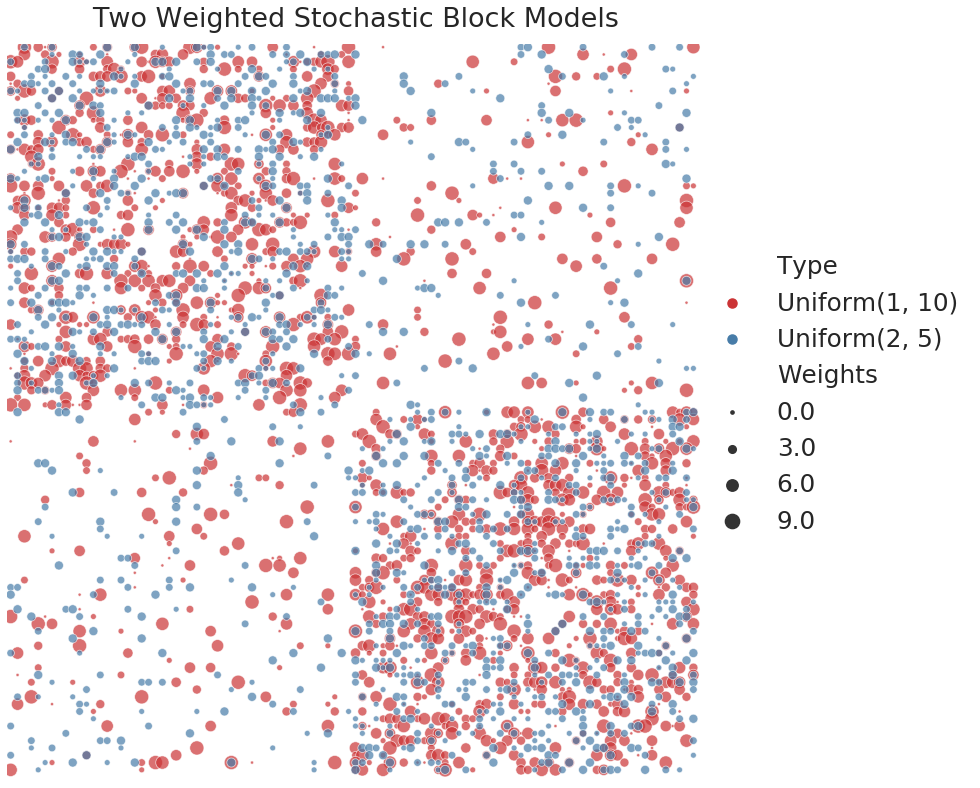

In [40]:
from graspy.simulations import sbm

n_communities = [50, 50]
p = np.array([[0.25, 0.05], [0.05, 0.25]])
wt = np.random.randint
wtargs = dict(low=1, high=10)

np.random.seed(1)
A_unif1= sbm(n_communities, p, wt=wt, wtargs=wtargs)

wtargs = dict(low=2, high=5)
A_unif2= sbm(n_communities, p, wt=wt, wtargs=wtargs)
from graspy.plot import gridplot

X = [A_unif1, A_unif2]
labels = ["Uniform(1, 10)", "Uniform(2, 5)"]

f = gridplot(X=X,
             labels=labels,
             title='Two Weighted Stochastic Block Models',
             height=12,
             font_scale=1.5)

(150, 3)


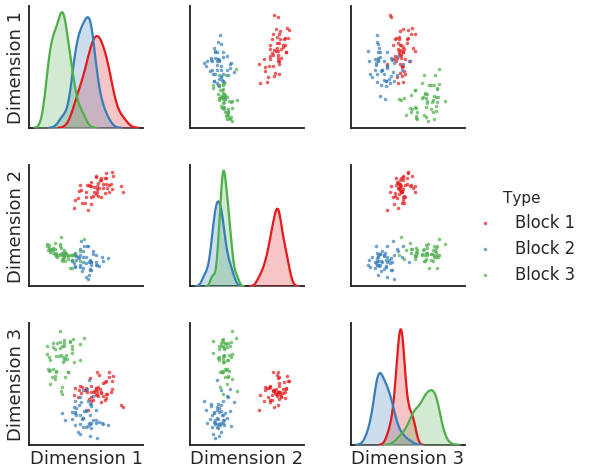

In [41]:
from graspy.simulations import sbm

n_communities = [50, 50, 50]
p = [[0.5, 0.1, 0.05],
     [0.1, 0.4, 0.15],
     [0.05, 0.15, 0.3],]

np.random.seed(2)
A = sbm(n_communities, p)

from graspy.embed import AdjacencySpectralEmbed

ase = AdjacencySpectralEmbed()
X = ase.fit_transform(A)

print(X.shape)
from graspy.plot import pairplot

labels = ['Block 1'] * 50 + ['Block 2'] * 50 + ['Block 3'] * 50

plot = pairplot(X, labels)
